Reading data using pandas

In [2]:
import pandas as pd
data = pd.read_csv('Advertising.csv',index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape


(200, 4)

What are the features?
   TV:  advertising dollars spent on TV for a single product in a given market ( in thousands of dollars)
   RADIO: advertising dollars spent on Radio
   NEWSPAPER: advertising dollars spent on Newspaper
What is the response?
   SALES: sales of a sinle product in a given market (in thousands of items
Regression problem

In [4]:
import seaborn as sns
%matplotlib inline

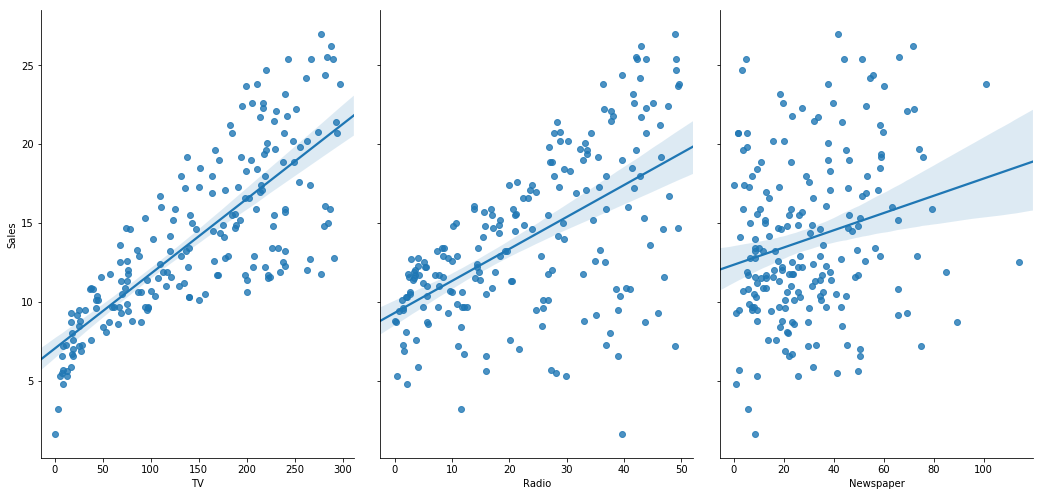

In [8]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,aspect=0.7, kind='reg')

    some linear relationship found, so linear regression model will be used to predict sales

In [13]:
feature_cols =['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data['Sales']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)


In [15]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
print(linreg.score(X_test,y_test))

0.9156213613792233


In [20]:
print(list(zip(feature_cols, linreg.coef_)))


[('TV', 0.04656456787415028), ('Radio', 0.17915812245088836), ('Newspaper', 0.0034504647111804347)]


In [21]:
y_pred = linreg.predict(X_test)

In [22]:
import numpy as np
from sklearn import metrics 
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955
